In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from viewer.viewer_src import *
from datasets.datasets import DatasetCenter
from utils.montages import full_referential_montage, full_bipolar_montage

In [10]:
path_data = '/media/moritz/a80fe7e6-2bb9-4818-8add-17fb9bb673e1/Data/Bonobo/cluster_center/' 
montage_module = init_montage_module(montages= [full_bipolar_montage])


In [11]:
def load_and_cut_signal(path_signal,Fq,start,end):
    signal = np.load(path_signal)
    signal=signal[:,start*Fq:end*Fq]
    return signal

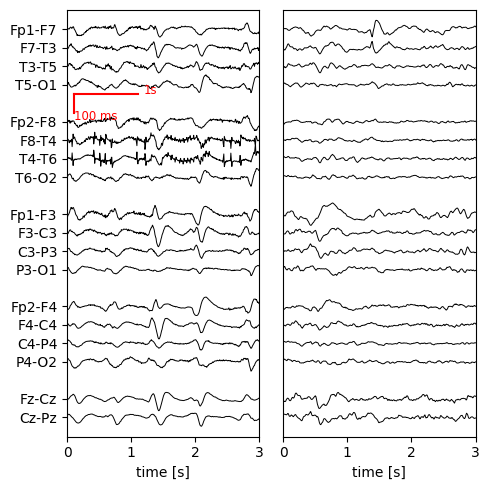

In [21]:

Fq = 128
start, end = 6,9
files = ['Bonobo00653_0_18046.npy','Bonobo00346_1_191211.npy']
path_signals = [os.path.join(path_data,f) for f in files]

fig, axs = plt.subplots(1,2,figsize = (5,5))
viewer_modules = []
for i, path_signal in enumerate(path_signals):
    ax = axs[i]
    signal = load_and_cut_signal(path_signal,Fq,start,end)
    y_labels=montage_module.montages[0].y_labels
    y_locations=montage_module.montages[0].y_locations
    viewer_module = init_viewer_module(ax,y_locations,y_labels,x_start=0,x_end=3,Fq=Fq)
    ax.set_xlim([0,3])
    viewer_modules.append(viewer_module)
    signal = montage_module.montages[0](signal)
    update_channels_with_signal(signal=signal,
                                channel_lines=viewer_modules[i].channel_lines,
                                y_locations=viewer_modules[i].y_locations) 
ruler = init_measure_module(axs[0],x_start=0.1,x_end=1.1,y_start=-350,y_end=-450,x_label='1s',y_label='100 ms',fontsize='small')
axs[1].set_yticks([])
axs[0].set_title('Generalised spike')
axs[1].set_title('Focalised spike')
axs[0].set_xlabel('time [s]')
axs[1].set_xlabel('time [s]')
fig.tight_layout()
fig.savefig('sample_spikes.png')


In [ ]:
ax

<Axes: >